In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.9MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 48.5MB/s ta 0:00:011
    100% |████████████████████████████████| 10.4MB 4.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 61kB 45.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 52.4MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 56.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 7.1MB 7.2MB/s  eta 0:00:01
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateu

In [3]:
# !pip install gluonts=="0.4.1"

In [33]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [34]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar
# from utils_gluonts11_deepstate import deep_state


In [35]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'm4_weekly_domain', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_demographic', 'm4_yearly_domain', 'm4_yearly_finance', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro', 'm4_yearly_other']


#### Note

In SageMaker data are saved into the following folders (example shows m4_weekly):

```
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json
```

In [36]:
dataname = "m4_monthly_industry"
dataset = get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_industry.


In [37]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [38]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 8370.,  8430.,  7880.,  8160.,  8290.,  8000.,  8240.,  7840.,
         8040.,  7930.,  7500.,  6610.,  7210.,  7390.,  6840.,  6600.,
         6810.,  6580.,  6040.,  6450.,  6670.,  6210.,  6330.,  6100.,
         6700.,  6690.,  5650.,  5270.,  5170.,  5870.,  6230.,  6730.,
         7370.,  7500.,  7670.,  6450.,  7140.,  6690.,  6650.,  7240.,
         7630.,  7310.,  7410.,  7720.,  7310.,  7030.,  6250.,  6430.,
         7100.,  6650.,  6200.,  6550.,  6750.,  6570.,  6540.,  6540.,
         6930.,  7340.,  7210.,  7190.,  7040.,  7460.,  8080.,  8910.,
         9330.,  9220.,  9280.,  9090.,  8990.,  8930.,  9110.,  9420.,
        10010.,  9740., 10100.,  9610.,  9810.,  9550.,  9660.,  9910.,
        10090.,  9630.,  9570.,  9290.,  9600.,  9370.,  9370.,  9460.,
         9180.,  9650.,  9400.,  9240.,  9210.,  8840.,  9090.,  9390.,
         9560.,  9590.,  9510.,  9620.,  9480.,  9930.,  9770.,  9490.,


## Plot Series

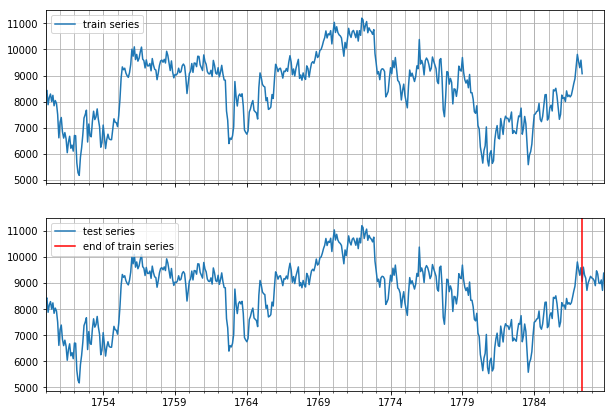

In [39]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [40]:
print("start:", dict(train_entry)["start"])
print("target:", dict(train_entry)["target"][:7])
print("feat_static_cat:", dict(train_entry)["feat_static_cat"])
print("length:", len(dataset.train))

start: 1750-01-31 00:00:00
target: [8370. 8430. 7880. 8160. 8290. 8000. 8240.]
feat_static_cat: [1]
length: 10017


In [41]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepstate import DeepStateEstimator

In [42]:
#########################
### deepstate wrapper ###

# data = "m4_yearly_other"
# seed = 44
# epochs = 500
# num_batches = 100
# batch_size = 32

def deepstate(dataname, seed=42, epochs=100, num_batches=50):
    
    mx.random.seed(seed)
    np.random.seed(seed)

    dataset = get_dataset(dataname, regenerate=False)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
        )

    cardinality = int(dataset.metadata.feat_static_cat[0].cardinality)
    estimator = DeepStateEstimator(
        trainer=trainer,
        cardinality=[cardinality],
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True,
        )

    predictor=estimator.train(dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
            dataset.test, predictor=predictor, num_samples=100
        )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = num_batches    

    df = pd.DataFrame([output])
    return df

## Results

## `m4_monthly_industry`

In [45]:
results = pd.DataFrame()

for i in range(42, 52):
    print("Seed:", i)
    df=deepstate("m4_monthly_industry", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:15<00:00,  6.39it/s, avg_epoch_loss=-.106]
INFO:root:Epoch[0] Elapsed time 15.659 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.106149
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.41it/s, avg_epoch_loss=0.615]
INFO:root:Epoch[1] Elapsed time 15.601 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.614518
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.43it/s, avg_epoch_loss=0.355]
INFO:root:Epoch[2] Elapsed time 15.559 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.354852
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:14<00:00,  6.77it/s, avg_epoch_loss=-.463]
INFO:root:Epoch[3] Elapsed time 14.770 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.463441
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.45it/s, a

100%|██████████| 100/100 [00:14<00:00,  6.87it/s, avg_epoch_loss=-.201]
INFO:root:Epoch[36] Elapsed time 14.572 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.200541
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.33it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[37] Elapsed time 15.801 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.743653
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.64it/s, avg_epoch_loss=-2.37]
INFO:root:Epoch[38] Elapsed time 15.082 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.368037
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.34it/s, avg_epoch_loss=-.325]
INFO:root:Epoch[39] Elapsed time 15.786 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.325425
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.63it/s, avg_epoch_loss=-1.53]
INFO:root:Epoch[40] Elapsed 

100%|██████████| 100/100 [00:15<00:00,  6.37it/s, avg_epoch_loss=-2.62]
INFO:root:Epoch[72] Elapsed time 15.700 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.621083
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:14<00:00,  6.68it/s, avg_epoch_loss=-1.28]
INFO:root:Epoch[73] Elapsed time 14.980 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.283039
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:14<00:00,  6.84it/s, avg_epoch_loss=-.803]
INFO:root:Epoch[74] Elapsed time 14.626 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.803266
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:14<00:00,  6.86it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[75] Elapsed time 14.576 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.518709
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:14<00:00,  6.69it/s, avg_epoch_loss=-1.64]
INFO:root:Epoch[76] Elap

INFO:root:Epoch[107] Evaluation metric 'epoch_loss'=-2.302050
INFO:root:Epoch[108] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.52it/s, avg_epoch_loss=-.317]
INFO:root:Epoch[108] Elapsed time 15.349 seconds
INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.317217
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.50it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[109] Elapsed time 15.398 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.831550
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.53it/s, avg_epoch_loss=-2.58]
INFO:root:Epoch[110] Elapsed time 15.314 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.576376
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.52it/s, avg_epoch_loss=-.416]
INFO:root:Epoch[111] Elapsed time 15.357 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.415814
INFO:root:Epoch[112] Learning 

INFO:root:Epoch[144] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.55it/s, avg_epoch_loss=-2.68]
INFO:root:Epoch[144] Elapsed time 15.275 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=-2.678312
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.79it/s, avg_epoch_loss=-1.31]
INFO:root:Epoch[145] Elapsed time 14.729 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.314538
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.59it/s, avg_epoch_loss=-.84]
INFO:root:Epoch[146] Elapsed time 15.189 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.839950
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.45it/s, avg_epoch_loss=-2.58]
INFO:root:Epoch[147] Elapsed time 15.526 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.575616
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.59it/s,

100%|██████████| 100/100 [00:15<00:00,  6.54it/s, avg_epoch_loss=-.424]
INFO:root:Epoch[180] Elapsed time 15.296 seconds
INFO:root:Epoch[180] Evaluation metric 'epoch_loss'=-0.424308
INFO:root:Epoch[181] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.48it/s, avg_epoch_loss=-2]  
INFO:root:Epoch[181] Elapsed time 15.429 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.998820
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.71it/s, avg_epoch_loss=-2.77]
INFO:root:Epoch[182] Elapsed time 14.918 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.767397
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.15it/s, avg_epoch_loss=-.518]
INFO:root:Epoch[183] Elapsed time 13.998 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.518380
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.87it/s, avg_epoch_loss=-1.75]
INFO:root:Epoch[184] 

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.20439  0.157033  20.577164            0.131546            0.084793    42   

   epochs  num_batches  
0     200          100  
Seed: 43


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:16<00:00,  6.15it/s, avg_epoch_loss=-.589]
INFO:root:Epoch[0] Elapsed time 16.269 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.588971
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.57it/s, avg_epoch_loss=0.72]
INFO:root:Epoch[1] Elapsed time 15.226 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.719900
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.44it/s, avg_epoch_loss=0.333]
INFO:root:Epoch[2] Elapsed time 15.544 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.332686
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.54it/s, avg_epoch_loss=-.762]
INFO:root:Epoch[3] Elapsed time 15.292 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.761532
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.56it/s, av

100%|██████████| 100/100 [00:14<00:00,  6.88it/s, avg_epoch_loss=-.177]
INFO:root:Epoch[36] Elapsed time 14.550 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.176914
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.62it/s, avg_epoch_loss=-1.76]
INFO:root:Epoch[37] Elapsed time 15.101 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.755753
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.51it/s, avg_epoch_loss=-2.38]
INFO:root:Epoch[38] Elapsed time 15.375 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.377151
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-.317]
INFO:root:Epoch[39] Elapsed time 15.041 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.316685
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:14<00:00,  6.74it/s, avg_epoch_loss=-1.54]
INFO:root:Epoch[40] Elapsed 

100%|██████████| 100/100 [00:14<00:00,  6.95it/s, avg_epoch_loss=-2.56]
INFO:root:Epoch[72] Elapsed time 14.392 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.562842
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-1.27]
INFO:root:Epoch[73] Elapsed time 15.045 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.269097
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:15<00:00,  6.64it/s, avg_epoch_loss=-.809]
INFO:root:Epoch[74] Elapsed time 15.079 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.808548
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:15<00:00,  6.41it/s, avg_epoch_loss=-2.49]
INFO:root:Epoch[75] Elapsed time 15.620 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.485326
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-1.62]
INFO:root:Epoch[76] Elap

INFO:root:Epoch[107] Evaluation metric 'epoch_loss'=-2.282113
INFO:root:Epoch[108] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-.33]
INFO:root:Epoch[108] Elapsed time 15.038 seconds
INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.329752
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.49it/s, avg_epoch_loss=-1.84]
INFO:root:Epoch[109] Elapsed time 15.422 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.844812
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.40it/s, avg_epoch_loss=-2.54]
INFO:root:Epoch[110] Elapsed time 15.627 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.540967
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.67it/s, avg_epoch_loss=-.435]
INFO:root:Epoch[111] Elapsed time 15.002 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.434962
INFO:root:Epoch[112] Learning r

INFO:root:Epoch[144] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-2.63]
INFO:root:Epoch[144] Elapsed time 15.053 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=-2.633329
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.73it/s, avg_epoch_loss=-1.32]
INFO:root:Epoch[145] Elapsed time 14.867 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.316161
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.68it/s, avg_epoch_loss=-.831]
INFO:root:Epoch[146] Elapsed time 14.981 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.830541
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.57it/s, avg_epoch_loss=-2.55]
INFO:root:Epoch[147] Elapsed time 15.220 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.551468
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.35it/s

100%|██████████| 100/100 [00:14<00:00,  6.80it/s, avg_epoch_loss=-.438]
INFO:root:Epoch[180] Elapsed time 14.719 seconds
INFO:root:Epoch[180] Evaluation metric 'epoch_loss'=-0.437842
INFO:root:Epoch[181] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.45it/s, avg_epoch_loss=-2]  
INFO:root:Epoch[181] Elapsed time 15.498 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.997414
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.48it/s, avg_epoch_loss=-2.68]
INFO:root:Epoch[182] Elapsed time 15.433 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.680344
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.40it/s, avg_epoch_loss=-.537]
INFO:root:Epoch[183] Elapsed time 15.627 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.536598
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:15<00:00,  6.32it/s, avg_epoch_loss=-1.76]
INFO:root:Epoch[184] 

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.219921  0.14964  19.295925            0.127638            0.076826    43   

   epochs  num_batches  
0     200          100  
Seed: 44


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:15<00:00,  6.59it/s, avg_epoch_loss=-.453]
INFO:root:Epoch[0] Elapsed time 15.185 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.452815
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.50it/s, avg_epoch_loss=1.37]
INFO:root:Epoch[1] Elapsed time 15.402 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=1.366005
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.43it/s, avg_epoch_loss=0.355]
INFO:root:Epoch[2] Elapsed time 15.564 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.355267
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:15<00:00,  6.55it/s, avg_epoch_loss=-.289]
INFO:root:Epoch[3] Elapsed time 15.277 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.288891
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:14<00:00,  6.76it/s, av

100%|██████████| 100/100 [00:16<00:00,  6.02it/s, avg_epoch_loss=-.191]
INFO:root:Epoch[36] Elapsed time 16.631 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.190601
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:14<00:00,  6.75it/s, avg_epoch_loss=-1.72]
INFO:root:Epoch[37] Elapsed time 14.815 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.724111
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-2.35]
INFO:root:Epoch[38] Elapsed time 15.051 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.349757
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.65it/s, avg_epoch_loss=-.323]
INFO:root:Epoch[39] Elapsed time 15.039 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.323362
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:15<00:00,  6.52it/s, avg_epoch_loss=-1.51]
INFO:root:Epoch[40] Elapsed 

100%|██████████| 100/100 [00:08<00:00, 11.93it/s, avg_epoch_loss=-2.53]
INFO:root:Epoch[72] Elapsed time 8.385 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.530382
INFO:root:Epoch[73] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.08it/s, avg_epoch_loss=-1.22]
INFO:root:Epoch[73] Elapsed time 8.282 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.220178
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.07it/s, avg_epoch_loss=-.788]
INFO:root:Epoch[74] Elapsed time 8.291 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.787936
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 11.97it/s, avg_epoch_loss=-2.45]
INFO:root:Epoch[75] Elapsed time 8.362 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.448953
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=-1.57]
INFO:root:Epoch[76] Elapsed 

INFO:root:Epoch[108] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.24it/s, avg_epoch_loss=-.299]
INFO:root:Epoch[108] Elapsed time 8.175 seconds
INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.299116
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.60it/s, avg_epoch_loss=-1.81]
INFO:root:Epoch[109] Elapsed time 8.622 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.813717
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.09it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[110] Elapsed time 8.275 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.517362
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=-.397]
INFO:root:Epoch[111] Elapsed time 8.224 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.396852
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.95it/s, av

100%|██████████| 100/100 [00:13<00:00,  7.54it/s, avg_epoch_loss=-2.61]
INFO:root:Epoch[144] Elapsed time 13.265 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=-2.611799
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.51it/s, avg_epoch_loss=-1.28]
INFO:root:Epoch[145] Elapsed time 13.325 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.279534
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.41it/s, avg_epoch_loss=-.814]
INFO:root:Epoch[146] Elapsed time 13.501 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.814455
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.92it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[147] Elapsed time 14.462 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.520525
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.20it/s, avg_epoch_loss=-1.62]
INFO:root:Epoch[148]

100%|██████████| 100/100 [00:13<00:00,  7.19it/s, avg_epoch_loss=-.43]
INFO:root:Epoch[180] Elapsed time 13.919 seconds
INFO:root:Epoch[180] Evaluation metric 'epoch_loss'=-0.429814
INFO:root:Epoch[181] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.20it/s, avg_epoch_loss=-1.96]
INFO:root:Epoch[181] Elapsed time 13.895 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.956980
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  7.03it/s, avg_epoch_loss=-2.72]
INFO:root:Epoch[182] Elapsed time 14.230 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.721558
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.22it/s, avg_epoch_loss=-.527]
INFO:root:Epoch[183] Elapsed time 13.852 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.527248
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.37it/s, avg_epoch_loss=-1.72]
INFO:root:Epoch[184] 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.141638  0.150218  18.147498            0.127143            0.074648   

   seed  epochs  num_batches  
0    44     200          100  
Seed: 45


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:13<00:00,  7.37it/s, avg_epoch_loss=-.391]
INFO:root:Epoch[0] Elapsed time 13.584 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.390926
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:14<00:00,  7.13it/s, avg_epoch_loss=0.671]
INFO:root:Epoch[1] Elapsed time 14.022 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.670936
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.43it/s, avg_epoch_loss=0.349]
INFO:root:Epoch[2] Elapsed time 13.475 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.348900
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.49it/s, avg_epoch_loss=-.66]
INFO:root:Epoch[3] Elapsed time 13.361 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.660481
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:14<00:00,  7.10it/s, av

100%|██████████| 100/100 [00:12<00:00,  7.92it/s, avg_epoch_loss=-.129]
INFO:root:Epoch[36] Elapsed time 12.639 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.129342
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:13<00:00,  7.51it/s, avg_epoch_loss=-1.7]
INFO:root:Epoch[37] Elapsed time 13.324 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.697900
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:13<00:00,  7.39it/s, avg_epoch_loss=-2.34]
INFO:root:Epoch[38] Elapsed time 13.542 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.336445
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:13<00:00,  7.17it/s, avg_epoch_loss=-.266]
INFO:root:Epoch[39] Elapsed time 13.956 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.266191
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:13<00:00,  7.18it/s, 

INFO:root:Epoch[71] Evaluation metric 'epoch_loss'=-0.045498
INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.37it/s, avg_epoch_loss=-2.18]
INFO:root:Epoch[72] Elapsed time 13.562 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.177246
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.45it/s, avg_epoch_loss=-.811]
INFO:root:Epoch[73] Elapsed time 13.422 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-0.810567
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.42it/s, avg_epoch_loss=-.237]
INFO:root:Epoch[74] Elapsed time 13.486 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.236507
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.25it/s, avg_epoch_loss=-2.06]
INFO:root:Epoch[75] Elapsed time 13.800 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.061651
INFO:root:Epoch[76] Learning rate is 5e-05


100%|██████████| 100/100 [00:12<00:00,  7.70it/s, avg_epoch_loss=-.104]
INFO:root:Epoch[108] Elapsed time 12.993 seconds
INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.104425
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  7.70it/s, avg_epoch_loss=-1.67]
INFO:root:Epoch[109] Elapsed time 12.996 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.670553
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.66it/s, avg_epoch_loss=-2.2]
INFO:root:Epoch[110] Elapsed time 13.059 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.199127
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  8.00it/s, avg_epoch_loss=-.193]
INFO:root:Epoch[111] Elapsed time 12.511 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.193430
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.45it/s, avg_epoch_loss=-1.46]
INFO:root:Epoch[112] 

100%|██████████| 100/100 [00:13<00:00,  7.60it/s, avg_epoch_loss=-2.39]
INFO:root:Epoch[144] Elapsed time 13.155 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=-2.393702
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  7.74it/s, avg_epoch_loss=-1.11]
INFO:root:Epoch[145] Elapsed time 12.916 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.106143
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  8.06it/s, avg_epoch_loss=-.683]
INFO:root:Epoch[146] Elapsed time 12.419 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.683169
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  7.86it/s, avg_epoch_loss=-2.32]
INFO:root:Epoch[147] Elapsed time 12.725 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.317043
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.41it/s, avg_epoch_loss=-1.43]
INFO:root:Epoch[148]

100%|██████████| 100/100 [00:12<00:00,  8.04it/s, avg_epoch_loss=-.328]
INFO:root:Epoch[180] Elapsed time 12.456 seconds
INFO:root:Epoch[180] Evaluation metric 'epoch_loss'=-0.328394
INFO:root:Epoch[181] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  6.72it/s, avg_epoch_loss=-1.86]
INFO:root:Epoch[181] Elapsed time 14.896 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.860084
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.34it/s, avg_epoch_loss=-2.5]
INFO:root:Epoch[182] Elapsed time 13.625 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.500156
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:14<00:00,  7.06it/s, avg_epoch_loss=-.42]
INFO:root:Epoch[183] Elapsed time 14.170 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.420148
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.42it/s, avg_epoch_loss=-1.63]
INFO:root:Epoch[184] E

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.171258  0.153138  17.786626            0.129795            0.075531   

   seed  epochs  num_batches  
0    45     200          100  
Seed: 46


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:13<00:00,  7.24it/s, avg_epoch_loss=-.567]
INFO:root:Epoch[0] Elapsed time 13.824 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.567125
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:14<00:00,  6.85it/s, avg_epoch_loss=0.238]
INFO:root:Epoch[1] Elapsed time 14.603 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.238368
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.21it/s, avg_epoch_loss=0.319]
INFO:root:Epoch[2] Elapsed time 13.879 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.318647
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.17it/s, avg_epoch_loss=-.505]
INFO:root:Epoch[3] Elapsed time 13.963 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.504734
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:13<00:00,  7.30it/s, a

100%|██████████| 100/100 [00:13<00:00,  7.24it/s, avg_epoch_loss=-.194]
INFO:root:Epoch[36] Elapsed time 13.818 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.194183
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:13<00:00,  7.36it/s, avg_epoch_loss=-1.69]
INFO:root:Epoch[37] Elapsed time 13.588 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.691512
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:14<00:00,  7.06it/s, avg_epoch_loss=-2.32]
INFO:root:Epoch[38] Elapsed time 14.166 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.318939
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:13<00:00,  7.31it/s, avg_epoch_loss=-.315]
INFO:root:Epoch[39] Elapsed time 13.694 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.314656
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:13<00:00,  7.41it/s,

INFO:root:Epoch[71] Evaluation metric 'epoch_loss'=0.272580
INFO:root:Epoch[72] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.23it/s, avg_epoch_loss=-2.18]
INFO:root:Epoch[72] Elapsed time 13.831 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.182697
INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.54it/s, avg_epoch_loss=-.753]
INFO:root:Epoch[73] Elapsed time 13.259 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-0.753194
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  7.77it/s, avg_epoch_loss=-.262]
INFO:root:Epoch[74] Elapsed time 12.880 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.261610
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:12<00:00,  7.94it/s, avg_epoch_loss=-2.06]
INFO:root:Epoch[75] Elapsed time 12.602 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.062775
INFO:root:Epoch[76] Learning rate is 5e-05
1

100%|██████████| 100/100 [00:14<00:00,  6.83it/s, avg_epoch_loss=-.158]
INFO:root:Epoch[108] Elapsed time 14.635 seconds
INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.158368
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.22it/s, avg_epoch_loss=-1.66]
INFO:root:Epoch[109] Elapsed time 13.875 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.657762
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.45it/s, avg_epoch_loss=-2.15]
INFO:root:Epoch[110] Elapsed time 13.420 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.152023
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.69it/s, avg_epoch_loss=-.242]
INFO:root:Epoch[111] Elapsed time 13.007 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.242174
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:13<00:00,  7.55it/s, avg_epoch_loss=-1.43]
INFO:root:Epoch[112]

100%|██████████| 100/100 [00:08<00:00, 11.98it/s, avg_epoch_loss=-2.41]
INFO:root:Epoch[144] Elapsed time 8.353 seconds
INFO:root:Epoch[144] Evaluation metric 'epoch_loss'=-2.407747
INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.98it/s, avg_epoch_loss=-1.08]
INFO:root:Epoch[145] Elapsed time 8.350 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.078128
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.02it/s, avg_epoch_loss=-.688]
INFO:root:Epoch[146] Elapsed time 8.318 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.687886
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.92it/s, avg_epoch_loss=-2.33]
INFO:root:Epoch[147] Elapsed time 8.389 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.329813
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.07it/s, avg_epoch_loss=-1.41]
INFO:root:Epoch[148] Ela

100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=-.313]
INFO:root:Epoch[180] Elapsed time 8.236 seconds
INFO:root:Epoch[180] Evaluation metric 'epoch_loss'=-0.312621
INFO:root:Epoch[181] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.06it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[181] Elapsed time 8.291 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.828514
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=-2.54]
INFO:root:Epoch[182] Elapsed time 8.305 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.542192
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.94it/s, avg_epoch_loss=-.397]
INFO:root:Epoch[183] Elapsed time 8.383 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.396571
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.99it/s, avg_epoch_loss=-1.59]
INFO:root:Epoch[184] Ela

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.137573  0.154216  17.944047            0.130032            0.077068   

   seed  epochs  num_batches  
0    46     200          100  
Seed: 47


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:08<00:00, 11.42it/s, avg_epoch_loss=-.637]
INFO:root:Epoch[0] Elapsed time 8.756 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.637010
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=0.162]
INFO:root:Epoch[1] Elapsed time 8.306 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.161864
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.96it/s, avg_epoch_loss=0.31]
INFO:root:Epoch[2] Elapsed time 8.363 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.309956
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.93it/s, avg_epoch_loss=-.605]
INFO:root:Epoch[3] Elapsed time 8.383 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.605376
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_ep

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.211773
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.06it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[37] Elapsed time 8.292 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.737521
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.64it/s, avg_epoch_loss=-2.37]
INFO:root:Epoch[38] Elapsed time 8.593 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.370885
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.86it/s, avg_epoch_loss=-.323]
INFO:root:Epoch[39] Elapsed time 8.434 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.322890
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.07it/s, avg_epoch_loss=-1.52]
INFO:root:Epoch[40] Elapsed time 8.287 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.520469
INFO:root:Epoch[41] Learning rate is 0.0005

100%|██████████| 100/100 [00:08<00:00, 11.98it/s, avg_epoch_loss=-1.22]
INFO:root:Epoch[73] Elapsed time 8.351 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.221546
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.11it/s, avg_epoch_loss=-.779]
INFO:root:Epoch[74] Elapsed time 8.257 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.778588
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 11.87it/s, avg_epoch_loss=-2.43]
INFO:root:Epoch[75] Elapsed time 8.424 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.430410
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 11.99it/s, avg_epoch_loss=-1.57]
INFO:root:Epoch[76] Elapsed time 8.342 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.566420
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 11.98it/s,

INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.98it/s, avg_epoch_loss=-1.81]
INFO:root:Epoch[109] Elapsed time 8.352 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.806189
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.96it/s, avg_epoch_loss=-2.51]
INFO:root:Epoch[110] Elapsed time 8.361 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.508703
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.12it/s, avg_epoch_loss=-.394]
INFO:root:Epoch[111] Elapsed time 8.252 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.393712
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.91it/s, avg_epoch_loss=-1.58]
INFO:root:Epoch[112] Elapsed time 8.400 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-1.578285
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.00it/s, av

100%|██████████| 100/100 [00:08<00:00, 12.09it/s, avg_epoch_loss=-1.26]
INFO:root:Epoch[145] Elapsed time 8.275 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.262878
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:09<00:00, 11.07it/s, avg_epoch_loss=-.803]
INFO:root:Epoch[146] Elapsed time 9.036 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.803414
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.89it/s, avg_epoch_loss=-2.5]
INFO:root:Epoch[147] Elapsed time 8.413 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.495982
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.07it/s, avg_epoch_loss=-1.6]
INFO:root:Epoch[148] Elapsed time 8.284 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-1.601876
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=-.682]
INFO:root:Epoch[149] Elaps

100%|██████████| 100/100 [00:08<00:00, 12.19it/s, avg_epoch_loss=-1.94]
INFO:root:Epoch[181] Elapsed time 8.205 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.941982
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.10it/s, avg_epoch_loss=-2.64]
INFO:root:Epoch[182] Elapsed time 8.266 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.642337
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.05it/s, avg_epoch_loss=-.48]
INFO:root:Epoch[183] Elapsed time 8.303 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.480266
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.09it/s, avg_epoch_loss=-1.7]
INFO:root:Epoch[184] Elapsed time 8.277 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-1.699340
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.01it/s, avg_epoch_loss=-2.79]
INFO:root:Epoch[185] Elaps

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.174293  0.154029  18.039888            0.130105            0.076877   

   seed  epochs  num_batches  
0    47     200          100  
Seed: 48


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:08<00:00, 11.70it/s, avg_epoch_loss=-.579]
INFO:root:Epoch[0] Elapsed time 8.552 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.578555
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.37it/s, avg_epoch_loss=0.311]
INFO:root:Epoch[1] Elapsed time 8.086 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.310726
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=0.326]
INFO:root:Epoch[2] Elapsed time 8.151 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.326282
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.33it/s, avg_epoch_loss=-.717]
INFO:root:Epoch[3] Elapsed time 8.111 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.716797
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.25it/s, avg_e

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.183945
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.18it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[37] Elapsed time 8.212 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.742635
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=-2.36]
INFO:root:Epoch[38] Elapsed time 8.150 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.359888
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.36it/s, avg_epoch_loss=-.315]
INFO:root:Epoch[39] Elapsed time 8.095 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.314726
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=-1]
INFO:root:Epoch[40] Elapsed time 8.151 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.00

100%|██████████| 100/100 [00:08<00:00, 12.06it/s, avg_epoch_loss=-2.3]
INFO:root:Epoch[72] Elapsed time 8.291 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.304344
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.09it/s, avg_epoch_loss=-.929]
INFO:root:Epoch[73] Elapsed time 8.275 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-0.928765
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=-.616]
INFO:root:Epoch[74] Elapsed time 8.154 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.616454
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=-2.24]
INFO:root:Epoch[75] Elapsed time 8.241 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.238460
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 11.37it/s, avg_epoch_loss=-1.28]
INFO:root:Epoch[76] Elaps

INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.223813
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.23it/s, avg_epoch_loss=-1.75]
INFO:root:Epoch[109] Elapsed time 8.179 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.749306
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.23it/s, avg_epoch_loss=-2.33]
INFO:root:Epoch[110] Elapsed time 8.177 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.330233
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.33it/s, avg_epoch_loss=-.305]
INFO:root:Epoch[111] Elapsed time 8.113 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.305388
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.24it/s, avg_epoch_loss=-1.53]
INFO:root:Epoch[112] Elapsed time 8.171 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-1.525446
INFO:root:Epoch[113] Learning rate

100%|██████████| 100/100 [00:08<00:00, 12.33it/s, avg_epoch_loss=-1.16]
INFO:root:Epoch[145] Elapsed time 8.115 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.161272
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.42it/s, avg_epoch_loss=-.738]
INFO:root:Epoch[146] Elapsed time 8.057 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.737587
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.26it/s, avg_epoch_loss=-2.42]
INFO:root:Epoch[147] Elapsed time 8.165 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.417880
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=-1.5]
INFO:root:Epoch[148] Elapsed time 8.152 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-1.502341
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.41it/s, avg_epoch_loss=-.621]
INFO:root:Epoch[149] Elap

100%|██████████| 100/100 [00:08<00:00, 12.22it/s, avg_epoch_loss=-1.88]
INFO:root:Epoch[181] Elapsed time 8.187 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.877577
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.26it/s, avg_epoch_loss=-2.61]
INFO:root:Epoch[182] Elapsed time 8.162 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.614101
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.37it/s, avg_epoch_loss=-.43]
INFO:root:Epoch[183] Elapsed time 8.086 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.430336
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.31it/s, avg_epoch_loss=-1.63]
INFO:root:Epoch[184] Elapsed time 8.128 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-1.633312
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.25it/s, avg_epoch_loss=-2.78]
INFO:root:Epoch[185] Elap

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.174115  0.154761  19.356608            0.130704            0.078394   

   seed  epochs  num_batches  
0    48     200          100  
Seed: 49


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:08<00:00, 11.43it/s, avg_epoch_loss=-.67]
INFO:root:Epoch[0] Elapsed time 8.749 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.669795
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.10it/s, avg_epoch_loss=0.325]
INFO:root:Epoch[1] Elapsed time 8.268 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.325178
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.19it/s, avg_epoch_loss=0.314]
INFO:root:Epoch[2] Elapsed time 8.204 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.313692
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.05it/s, avg_epoch_loss=-.566]
INFO:root:Epoch[3] Elapsed time 8.300 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.566433
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.29it/s, avg_ep

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.189762
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=-1.73]
INFO:root:Epoch[37] Elapsed time 8.306 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.734770
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.99it/s, avg_epoch_loss=-2.35]
INFO:root:Epoch[38] Elapsed time 8.346 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.350350
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.34it/s, avg_epoch_loss=-.305]
INFO:root:Epoch[39] Elapsed time 8.106 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.305149
INFO:root:Loading parameters from best epoch (19)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=-1.08]
INFO:root:Epoch[40] Elapsed time 8.229 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1

100%|██████████| 100/100 [00:08<00:00, 12.08it/s, avg_epoch_loss=-2.33]
INFO:root:Epoch[72] Elapsed time 8.283 seconds
INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=-2.326678
INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.10it/s, avg_epoch_loss=-.952]
INFO:root:Epoch[73] Elapsed time 8.263 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-0.951959
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.24it/s, avg_epoch_loss=-.6]
INFO:root:Epoch[74] Elapsed time 8.173 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.600482
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=-2.26]
INFO:root:Epoch[75] Elapsed time 8.225 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.257869
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.13it/s, avg_epoch_loss=-1.29]
INFO:root:Epoch[76] Elapse

INFO:root:Epoch[108] Evaluation metric 'epoch_loss'=-0.213874
INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.21it/s, avg_epoch_loss=-1.75]
INFO:root:Epoch[109] Elapsed time 8.189 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.753671
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=-2.37]
INFO:root:Epoch[110] Elapsed time 8.227 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.365703
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.37it/s, avg_epoch_loss=-.297]
INFO:root:Epoch[111] Elapsed time 8.085 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.296828
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.13it/s, avg_epoch_loss=-1.53]
INFO:root:Epoch[112] Elapsed time 8.248 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-1.527003
INFO:root:Epoch[113] Learning rate

INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.24it/s, avg_epoch_loss=-1.19]
INFO:root:Epoch[145] Elapsed time 8.172 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.191752
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=-.733]
INFO:root:Epoch[146] Elapsed time 8.152 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.732614
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=-2.47]
INFO:root:Epoch[147] Elapsed time 8.246 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.468451
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.29it/s, avg_epoch_loss=-1.54]
INFO:root:Epoch[148] Elapsed time 8.141 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-1.544849
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.33it/s, av

100%|██████████| 100/100 [00:08<00:00, 11.67it/s, avg_epoch_loss=-1.91]
INFO:root:Epoch[181] Elapsed time 8.572 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.907908
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.07it/s, avg_epoch_loss=-2.69]
INFO:root:Epoch[182] Elapsed time 8.289 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.686867
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.25it/s, avg_epoch_loss=-.437]
INFO:root:Epoch[183] Elapsed time 8.170 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.436572
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.30it/s, avg_epoch_loss=-1.67]
INFO:root:Epoch[184] Elapsed time 8.134 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-1.665614
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=-2.84]
INFO:root:Epoch[185] Ela

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.193178  0.154563  20.156466            0.131001            0.078283   

   seed  epochs  num_batches  
0    49     200          100  
Seed: 50


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:08<00:00, 11.37it/s, avg_epoch_loss=-.569]
INFO:root:Epoch[0] Elapsed time 8.800 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.569349
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.98it/s, avg_epoch_loss=0.195]
INFO:root:Epoch[1] Elapsed time 8.352 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.194975
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=0.308]
INFO:root:Epoch[2] Elapsed time 8.232 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.307515
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.02it/s, avg_epoch_loss=-.831]
INFO:root:Epoch[3] Elapsed time 8.322 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.830845
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 11.99it/s, avg_e

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.225203
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.09it/s, avg_epoch_loss=-1.72]
INFO:root:Epoch[37] Elapsed time 8.276 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.724982
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.27it/s, avg_epoch_loss=-2.43]
INFO:root:Epoch[38] Elapsed time 8.155 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.432594
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=-.337]
INFO:root:Epoch[39] Elapsed time 8.219 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.337339
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.08it/s, avg_epoch_loss=-1.5]
INFO:root:Epoch[40] Elapsed time 8.281 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.502218
INFO:root:Epoch[41] Learning rate is 0.0005


INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.19it/s, avg_epoch_loss=-1.15]
INFO:root:Epoch[73] Elapsed time 8.208 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.145154
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.33it/s, avg_epoch_loss=-.64]
INFO:root:Epoch[74] Elapsed time 8.113 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.639789
INFO:root:Loading parameters from best epoch (44)
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.13it/s, avg_epoch_loss=-2.09]
INFO:root:Epoch[75] Elapsed time 8.245 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.088210
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:08<00:00, 12.18it/s, avg_epoch_loss=-1.44]
INFO:root:Epoch[76] Elapsed time 8.212 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.444514
INFO:root:Epoch[77] Learning rate is 6.25e-05
1

100%|██████████| 100/100 [00:08<00:00, 11.47it/s, avg_epoch_loss=-1.72]
INFO:root:Epoch[109] Elapsed time 8.723 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.718087
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.81it/s, avg_epoch_loss=-2.47]
INFO:root:Epoch[110] Elapsed time 8.469 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.471633
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.22it/s, avg_epoch_loss=-.377]
INFO:root:Epoch[111] Elapsed time 8.183 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.376636
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.97it/s, avg_epoch_loss=-1.49]
INFO:root:Epoch[112] Elapsed time 8.353 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-1.488247
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=-2.64]
INFO:root:Epoch[113] Ela

100%|██████████| 100/100 [00:08<00:00, 12.19it/s, avg_epoch_loss=-1.26]
INFO:root:Epoch[145] Elapsed time 8.208 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.264155
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.97it/s, avg_epoch_loss=-.768]
INFO:root:Epoch[146] Elapsed time 8.358 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.768418
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.02it/s, avg_epoch_loss=-2.52]
INFO:root:Epoch[147] Elapsed time 8.320 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.521281
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=-1.61]
INFO:root:Epoch[148] Elapsed time 8.242 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-1.614426
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.28it/s, avg_epoch_loss=-.673]
INFO:root:Epoch[149] Ela

100%|██████████| 100/100 [00:08<00:00, 12.08it/s, avg_epoch_loss=-1.94]
INFO:root:Epoch[181] Elapsed time 8.283 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.944682
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=-2.72]
INFO:root:Epoch[182] Elapsed time 8.245 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.723378
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.18it/s, avg_epoch_loss=-.502]
INFO:root:Epoch[183] Elapsed time 8.211 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.502309
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.07it/s, avg_epoch_loss=-1.7]
INFO:root:Epoch[184] Elapsed time 8.286 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-1.704424
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=-2.88]
INFO:root:Epoch[185] Elap

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.12138  0.149141  18.588513            0.126156            0.076832    50   

   epochs  num_batches  
0     200          100  
Seed: 51


INFO:root:Number of parameters in DeepStateTrainingNetwork: 530199
100%|██████████| 100/100 [00:08<00:00, 11.64it/s, avg_epoch_loss=-.294]
INFO:root:Epoch[0] Elapsed time 8.593 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-0.294247
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=0.589]
INFO:root:Epoch[1] Elapsed time 8.228 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=0.589071
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.16it/s, avg_epoch_loss=0.351]
INFO:root:Epoch[2] Elapsed time 8.225 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=0.351197
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.10it/s, avg_epoch_loss=-.631]
INFO:root:Epoch[3] Elapsed time 8.269 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-0.630964
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_e

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=-0.193804
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.23it/s, avg_epoch_loss=-1.73]
INFO:root:Epoch[37] Elapsed time 8.176 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=-1.727453
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.04it/s, avg_epoch_loss=-2.36]
INFO:root:Epoch[38] Elapsed time 8.309 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=-2.360363
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 11.94it/s, avg_epoch_loss=-.31]
INFO:root:Epoch[39] Elapsed time 8.380 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=-0.310325
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:08<00:00, 12.06it/s, avg_epoch_loss=-1.5]
INFO:root:Epoch[40] Elapsed time 8.291 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=-1.500838
INFO:root:Epoch[41] Learning rate is 0.0005
1

100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=-1.25]
INFO:root:Epoch[73] Elapsed time 8.235 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=-1.250349
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.33it/s, avg_epoch_loss=-.766]
INFO:root:Epoch[74] Elapsed time 8.114 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=-0.765541
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.13it/s, avg_epoch_loss=-2.49]
INFO:root:Epoch[75] Elapsed time 8.244 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=-2.490506
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:08<00:00, 12.13it/s, avg_epoch_loss=-1.62]
INFO:root:Epoch[76] Elapsed time 8.248 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=-1.617814
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:08<00:00, 12.10it/s,

INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=-1.81]
INFO:root:Epoch[109] Elapsed time 8.217 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=-1.814360
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.95it/s, avg_epoch_loss=-2.57]
INFO:root:Epoch[110] Elapsed time 8.371 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=-2.567347
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=-.388]
INFO:root:Epoch[111] Elapsed time 8.230 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=-0.388078
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.02it/s, avg_epoch_loss=-1.59]
INFO:root:Epoch[112] Elapsed time 8.322 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=-1.589660
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.89it/s, av

100%|██████████| 100/100 [00:08<00:00, 12.14it/s, avg_epoch_loss=-1.29]
INFO:root:Epoch[145] Elapsed time 8.242 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=-1.294690
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.17it/s, avg_epoch_loss=-.801]
INFO:root:Epoch[146] Elapsed time 8.220 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=-0.800903
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.49it/s, avg_epoch_loss=-2.57]
INFO:root:Epoch[147] Elapsed time 8.709 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=-2.566197
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.66it/s, avg_epoch_loss=-1.66]
INFO:root:Epoch[148] Elapsed time 8.582 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=-1.655940
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.31it/s, avg_epoch_loss=-.68]
INFO:root:Epoch[149] Elap

100%|██████████| 100/100 [00:08<00:00, 12.06it/s, avg_epoch_loss=-1.97]
INFO:root:Epoch[181] Elapsed time 8.293 seconds
INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=-1.965953
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 11.95it/s, avg_epoch_loss=-2.76]
INFO:root:Epoch[182] Elapsed time 8.368 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=-2.763119
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.32it/s, avg_epoch_loss=-.505]
INFO:root:Epoch[183] Elapsed time 8.119 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=-0.505257
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.10it/s, avg_epoch_loss=-1.73]
INFO:root:Epoch[184] Elapsed time 8.266 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=-1.728560
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:08<00:00, 12.15it/s, avg_epoch_loss=-2.92]
INFO:root:Epoch[185] Ela

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.154918  0.151201  19.048229            0.127979            0.074922   

   seed  epochs  num_batches  
0    51     200          100  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.204390,0.157033,20.577164,0.131546,0.084793,42,200,100
0,1.219921,0.149640,19.295925,0.127638,0.076826,43,200,100
0,1.141638,0.150218,18.147498,0.127143,0.074648,44,200,100
0,1.171258,0.153138,17.786626,0.129795,0.075531,45,200,100
0,1.137573,0.154216,17.944047,0.130032,0.077068,46,200,100
0,1.174293,0.154029,18.039888,0.130105,0.076877,47,200,100
0,1.174115,0.154761,19.356608,0.130704,0.078394,48,200,100
0,1.193178,0.154563,20.156466,0.131001,0.078283,49,200,100
0,1.121380,0.149141,18.588513,0.126156,0.076832,50,200,100
0,1.154918,0.151201,19.048229,0.127979,0.074922,51,200,100


## `m4_hourly`

In [46]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df=deepstate("m4_hourly", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_hourly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepStateTrainingNetwork: 52087
100%|██████████| 50/50 [02:40<00:00,  3.21s/it, avg_epoch_loss=0.126]
INFO:root:Epoch[0] Elapsed time 160.311 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=0.125870
INFO:root:Epoch[1] Learning rate is 0.001
 10%|█         | 5/50 [00:16<02:24,  3.22s/it, avg_epoch_loss=0.0121]


KeyboardInterrupt: 